In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [55]:
folder = '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/'
images = [i for i in os.listdir(folder) if i.endswith('.jpg')]
img_paths = {f'img{i+1}_path': os.path.join(folder, images[i]) for i in range(len(images))}

print(img_paths)

def resize_image(image, new_size=(512, 512)):
    return cv2.resize(image, new_size)

{'img1_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image1.jpg', 'img2_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image2.jpg', 'img3_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image3.jpg', 'img4_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image4.jpg', 'img5_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image5.jpg', 'img6_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image6.jpg', 'img7_path': '/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab2/24241266_PravakarDas_Lab02/Image7.jpg'}


In [45]:
#kernals & other funtions:
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]], dtype=np.float32)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)

def gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=np.float32)
horizontal_kernel = np.array([[-1, -1, -1],
                              [0,  0,  0],
                              [1,  1,  1]], dtype=np.float32)

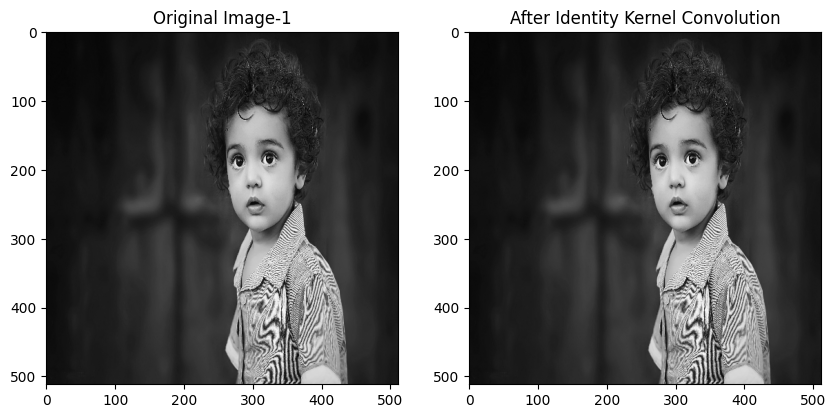

In [46]:
#1. Apply Convolution with a Simple Kernel
img1 = cv2.imread(img_paths['img1_path'], cv2.IMREAD_GRAYSCALE)
img1 = resize_image(img1)

convolved_img1 = cv2.filter2D(img1, -1, identity_kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image-1')

plt.subplot(1,2,2)
plt.imshow(convolved_img1, cmap='gray')
plt.title('After Identity Kernel Convolution')
plt.show()

The output image remains almost identical to the input image cause the identity kernel preserves the original pixel values which means applying an identity filter does not alter the image's content, making it a useful baseline for comparison.

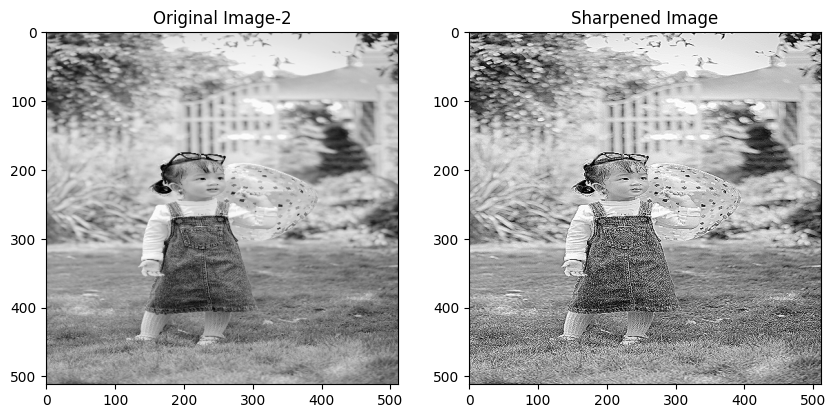

In [47]:
#2. Custom Kernel Design

img2 = cv2.imread(img_paths['img2_path'], cv2.IMREAD_GRAYSCALE)
img2 = resize_image(img2)

sharpened_img = cv2.filter2D(img2, -1, sharpen_kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image-2')

plt.subplot(1,2,2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.show()

The output image displays enhanced edge details and improved contrast due to the sharpening effect,but it also reveals some underlying noise. This occurs because the sharpening kernel accentuates high-frequency components, making both the edges and the inherent noise more prominent.

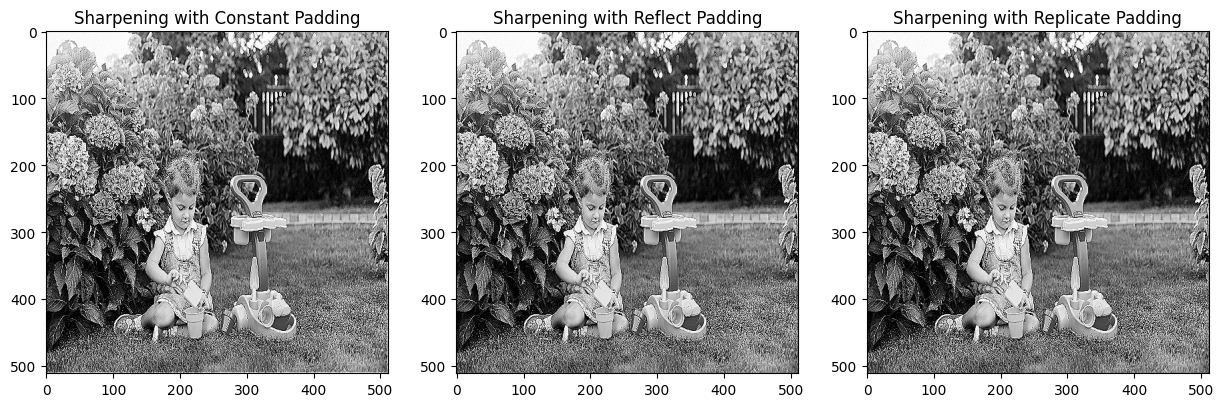

In [48]:
#3. Experiment with Different Padding Techniques

img3 = cv2.imread(img_paths['img3_path'], cv2.IMREAD_GRAYSCALE)
img3 = resize_image(img3)

img3_sharpen_constant = cv2.filter2D(img3, -1, sharpen_kernel, borderType=cv2.BORDER_CONSTANT)
img3_sharpen_reflect = cv2.filter2D(img3, -1, sharpen_kernel, borderType=cv2.BORDER_REFLECT)
img3_sharpen_replicate = cv2.filter2D(img3, -1, sharpen_kernel, borderType=cv2.BORDER_REPLICATE)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img3_sharpen_constant, cmap='gray')
plt.title('Sharpening with Constant Padding')

plt.subplot(1,3,2)
plt.imshow(img3_sharpen_reflect, cmap='gray')
plt.title('Sharpening with Reflect Padding')

plt.subplot(1,3,3)
plt.imshow(img3_sharpen_replicate, cmap='gray')
plt.title('Sharpening with Replicate Padding')

plt.show()

The output images with constant, reflect, and replicate padding look very similar cause the differences in border handling are minimal compared to the central part of the image, where most of the details lie. Padding defines how the filter deals with image edges during convolution, and here, even though each method treats the borders slightly differently, the overall effect on the noise-reduced, sharpened image is almost identical.

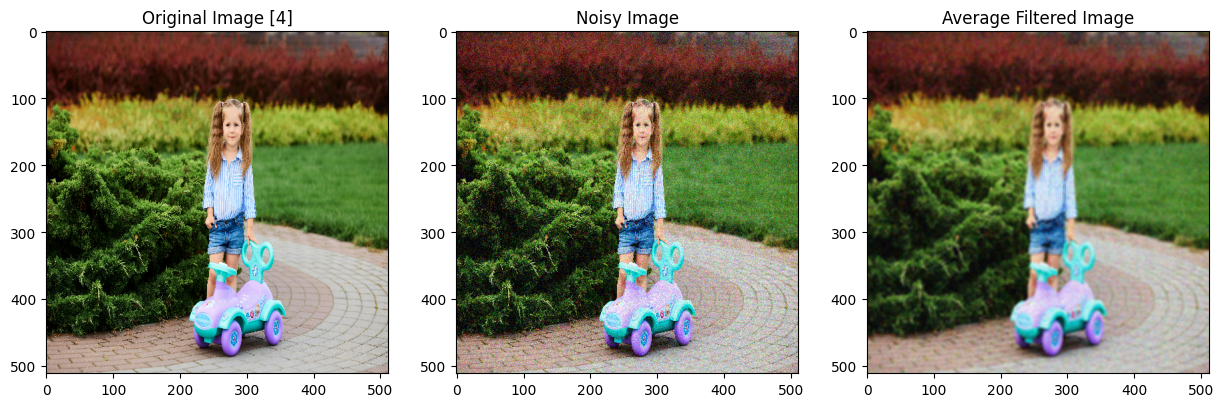

In [49]:
#4.  Adding Noise and Applying an Average Filter

img4 = cv2.imread(img_paths['img4_path'], cv2.IMREAD_COLOR)
img4 = resize_image(img4)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
noisy_img4 = gaussian_noise(img4)

average_filtered_img4 = cv2.blur(noisy_img4, (5,5))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img4)
plt.title('Original Image [4]')

plt.subplot(1,3,2)
plt.imshow(noisy_img4)
plt.title('Noisy Image')

plt.subplot(1,3,3)
plt.imshow(average_filtered_img4)
plt.title('Average Filtered Image')

plt.show()

The noisy image exhibits significant noise, resulting in a contrasty and hazy appearance where individual pixels remain discernible due to the 250×250 resolution. In contrast, the average filtered image is heavily blurred, as the averaging process smooths out the high-frequency noise, leading to a loss of detail.

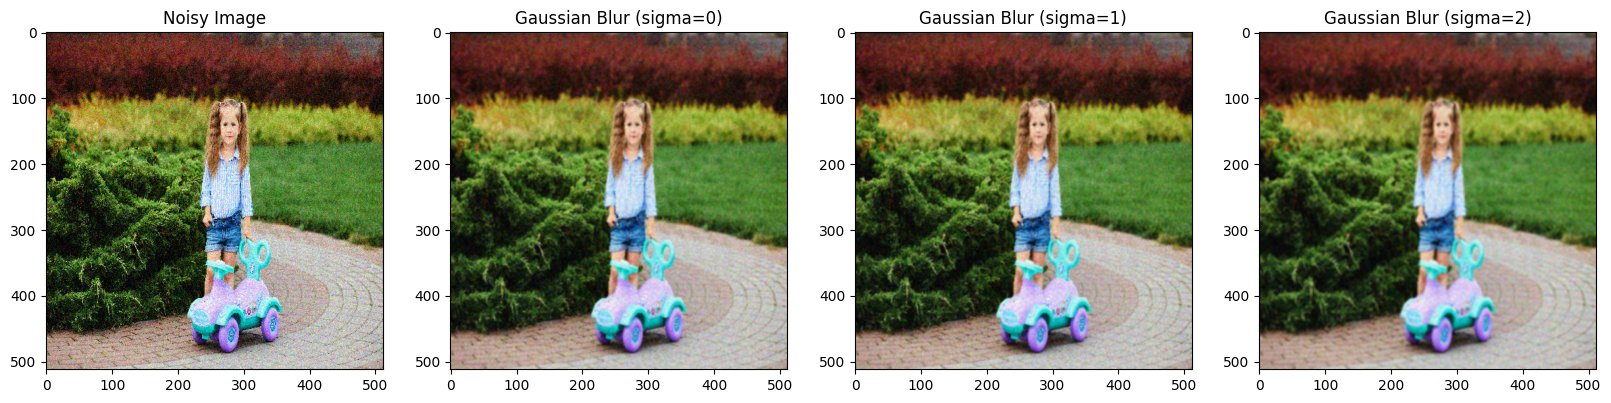

In [50]:
#5. Gaussian Blur for Smoothing
gaussian_blur_sigma0 = cv2.GaussianBlur(noisy_img4, (5,5), sigmaX=0)
gaussian_blur_sigma1 = cv2.GaussianBlur(noisy_img4, (5,5), sigmaX=1)
gaussian_blur_sigma2 = cv2.GaussianBlur(noisy_img4, (5,5), sigmaX=2)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(noisy_img4)
plt.title('Noisy Image')

plt.subplot(1,4,2)
plt.imshow(gaussian_blur_sigma0)
plt.title('Gaussian Blur (sigma=0)')

plt.subplot(1,4,3)
plt.imshow(gaussian_blur_sigma1)
plt.title('Gaussian Blur (sigma=1)')

plt.subplot(1,4,4)
plt.imshow(gaussian_blur_sigma2)
plt.title('Gaussian Blur (sigma=2)')

plt.show()

The Gaussian blurred images show that as the sigma value increases, the image becomes increasingly unclear.At sigma 2, the image is almost entirely blurred, emphasizing how a higher standard deviation in the Gaussian kernel leads to stronger smoothing and a significant loss of detail.

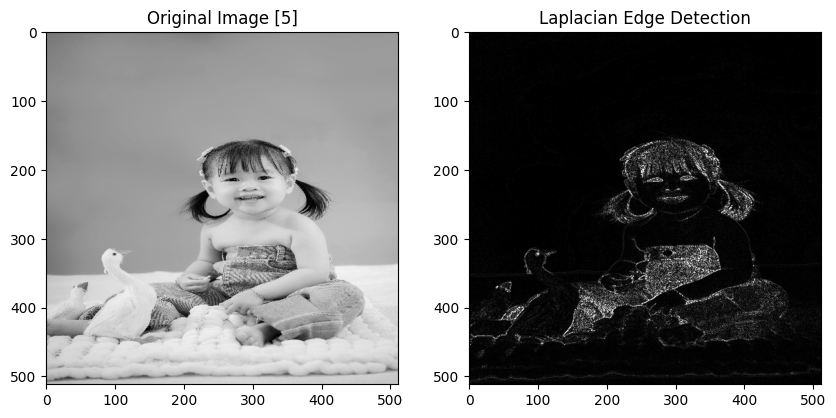

In [51]:
#6. Applying Laplacian Filter for Edge Detection
img5 = cv2.imread(img_paths['img5_path'], cv2.IMREAD_GRAYSCALE)
img5 = resize_image(img5)

laplacian_img5 = cv2.Laplacian(img5, cv2.CV_64F)
laplacian_img5 = cv2.convertScaleAbs(laplacian_img5)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img5, cmap='gray')
plt.title('Original Image [5]')

plt.subplot(1,2,2)
plt.imshow(laplacian_img5, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()

The Laplacian filter effectively captures abrupt intensity transitions, highlighting edges and contours in the image.Interestingly, resizing the image before applying the filter can help unify the scale of details and reduce noise,making edges stand out more clearly—whereas on a large, high-resolution image, subtle intensity variations and noise can interfere with clean edge detection.

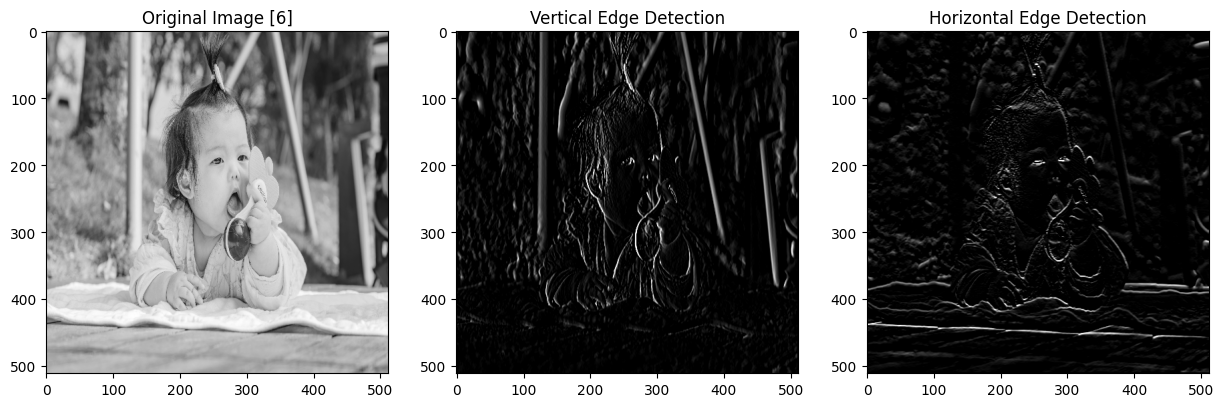

In [52]:
#7. Estimating Horizontal and Vertical Gradients

img6 = cv2.imread(img_paths['img6_path'], cv2.IMREAD_GRAYSCALE)
img6 = resize_image(img6)

vertical_edges = cv2.filter2D(img6, -1, vertical_kernel)
horizontal_edges = cv2.filter2D(img6, -1, horizontal_kernel)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img6, cmap='gray')
plt.title('Original Image [6]')

plt.subplot(1,3,2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edge Detection')

plt.subplot(1,3,3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edge Detection')

plt.show()

The vertical edge detection image highlights edges where intensity changes occur from left to right, the horizontal edge detection image emphasizes edges where intensity changes occur from top to bottom. By applying these two different gradient kernels, we can clearly see how each orientation of edges (vertical vs. horizontal) is captured in separate outputs.

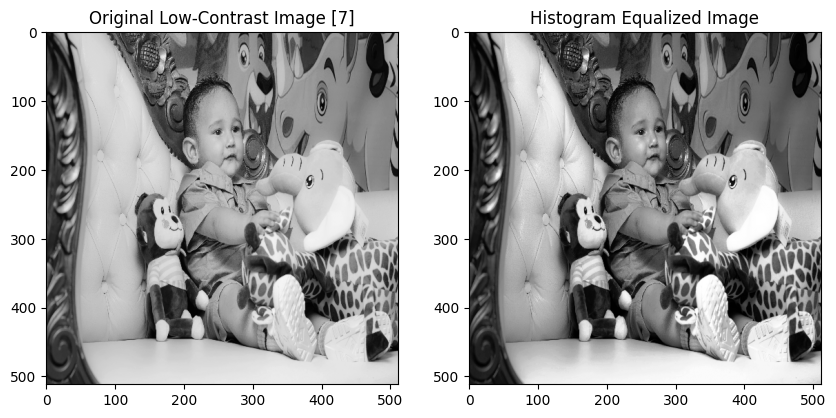

In [53]:
#8. Histogram Equalization for Contrast Enhancement

img7 = cv2.imread(img_paths['img7_path'], cv2.IMREAD_GRAYSCALE)
img7=resize_image(img7)

equalized_img7 = cv2.equalizeHist(img7)

# Plot the original and equalized images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img7, cmap='gray')
plt.title('Original Low-Contrast Image [7]')

plt.subplot(1,2,2)
plt.imshow(equalized_img7, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

The original low-contrast image exhibits a narrow range of gray values, making it appear somewhat flat. After histogram equalization, the intensity distribution is stretched, enhancing contrast and revealing more detail in both darker and lighter regions of the image.

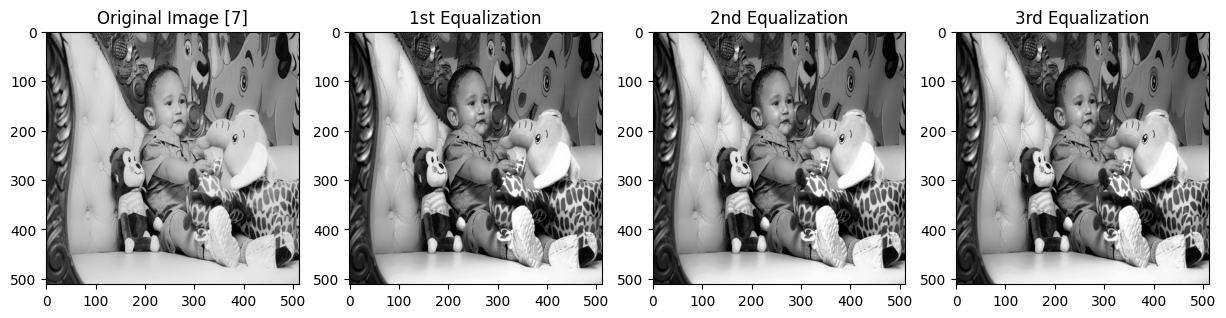

In [54]:
#8. Histogram Equalization for Contrast Enhancement
equalized_img7_first = cv2.equalizeHist(img7)
equalized_img7_second = cv2.equalizeHist(equalized_img7_first)
equalized_img7_third = cv2.equalizeHist(equalized_img7_second)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img7, cmap='gray')
plt.title('Original Image [7]')


plt.subplot(1,4,2)
plt.imshow(equalized_img7_first, cmap='gray')
plt.title('1st Equalization')

plt.subplot(1,4,3)
plt.imshow(equalized_img7_second, cmap='gray')
plt.title('2nd Equalization')

plt.subplot(1,4,4)
plt.imshow(equalized_img7_third, cmap='gray')
plt.title('3rd Equalization')

plt.show()

The image’s intensity distribution is re-stretched from an already modified range. As a result, the midtones and darker regions become more compressed or shifted, causing the image to appear darker yet more contrasty. So, it process new details but also saturating certain areas, leading to potential artifacts or overly intense contrast.